## Importando as bibliotecas necessárias:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import defs
import appynho

## Carregando os dados:

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_28D = defs.read_well('../data/7-MP-28D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])
well_31D = defs.read_well('../data/7-MP-31D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])
well_53D = defs.read_well('../data/7-MP-53D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])
well_56D = defs.read_well('../data/7-MP-56D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])

## Organização dos dados:

In [4]:
#calculating the DRDN log for all wells
# using the function "drdn" in the file "defs"
drdn_28D = defs.drdn(well_28D['RHOB'], well_28D['NPHI'])
well_28D['DRDN'] = drdn_28D
drdn_31D = defs.drdn(well_31D['RHOB'], well_31D['NPHI'])
well_31D['DRDN'] = drdn_31D
drdn_53D = defs.drdn(well_53D['RHOB'], well_53D['NPHI'])
well_53D['DRDN'] = drdn_53D
drdn_56D = defs.drdn(well_56D['RHOB'], well_56D['NPHI'])
well_56D['DRDN'] = drdn_56D

In [5]:
# calculating the lithology curve for all wells, using the DRDN log
# using the function "create_lithology" in the file "defs"
litho_28D = defs.create_lithology(drdn_28D)
well_28D['LITHOLOGY'] = litho_28D
litho_31D = defs.create_lithology(drdn_31D)
well_31D['LITHOLOGY'] = litho_31D
litho_53D = defs.create_lithology(drdn_53D)
well_53D['LITHOLOGY'] = litho_53D
litho_56D = defs.create_lithology(drdn_56D)
well_56D['LITHOLOGY'] = litho_56D

In [6]:
#setting top and base of the Maracangalha formation
top = 2500.00
base = 3100.00
step = 50.0
overlap = 0.10

In [7]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_28D = defs.formation_zone(well_28D, top, base)
formation_31D = defs.formation_zone(well_31D, top, base)
formation_53D = defs.formation_zone(well_53D, top, base)
formation_56D = defs.formation_zone(well_56D, top, base)

In [8]:
#creating curves that only contains one lithology type, for each lithology
#using the function "separate_lithology" in the file "defs"
separate_28D = defs.separate_lithology(formation_28D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])
separate_31D = defs.separate_lithology(formation_31D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])
separate_53D = defs.separate_lithology(formation_53D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])
separate_56D = defs.separate_lithology(formation_56D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])

## Visualização dos poços:

In [9]:
# a dictionary where the keys are lithology codes and the values are colors code for each lithology
# its necessary for the lithology plot
cores = {}
for lith in litho_types:
    cores[int(litho_types[lith]['CODE'])] = litho_types[lith]['COLOR']

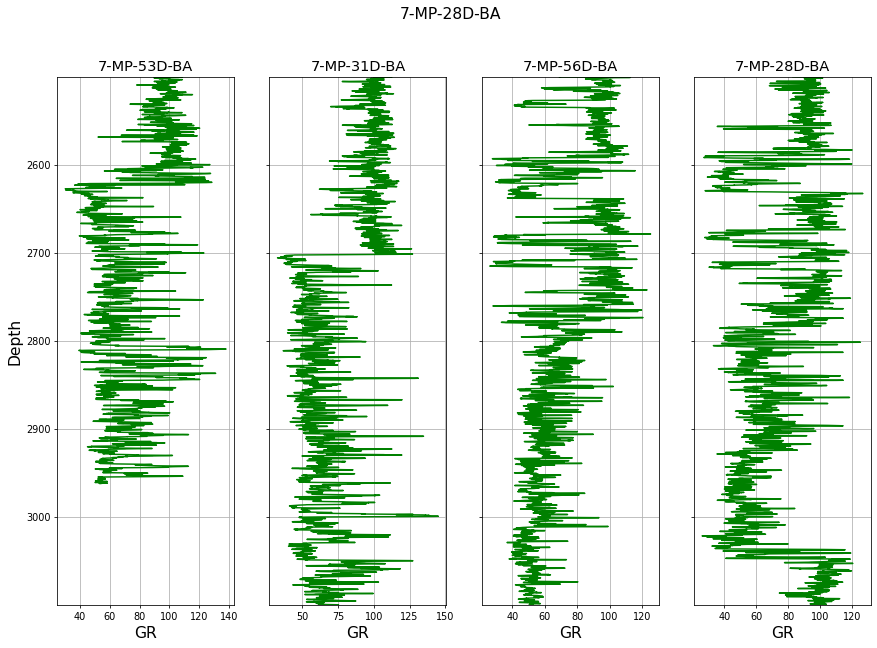

In [10]:
grafico = appynho.plotagem(4, titulo = '7-MP-28D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_53D['GR'], separate_53D['DEPTH'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = '7-MP-53D-BA')
grafico.plot_s(1, separate_31D['GR'], separate_31D['DEPTH'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = '7-MP-31D-BA')
grafico.plot_s(2, separate_56D['GR'], separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = '7-MP-56D-BA')
grafico.plot_s(3, separate_28D['GR'], separate_28D['DEPTH'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = '7-MP-28D-BA')

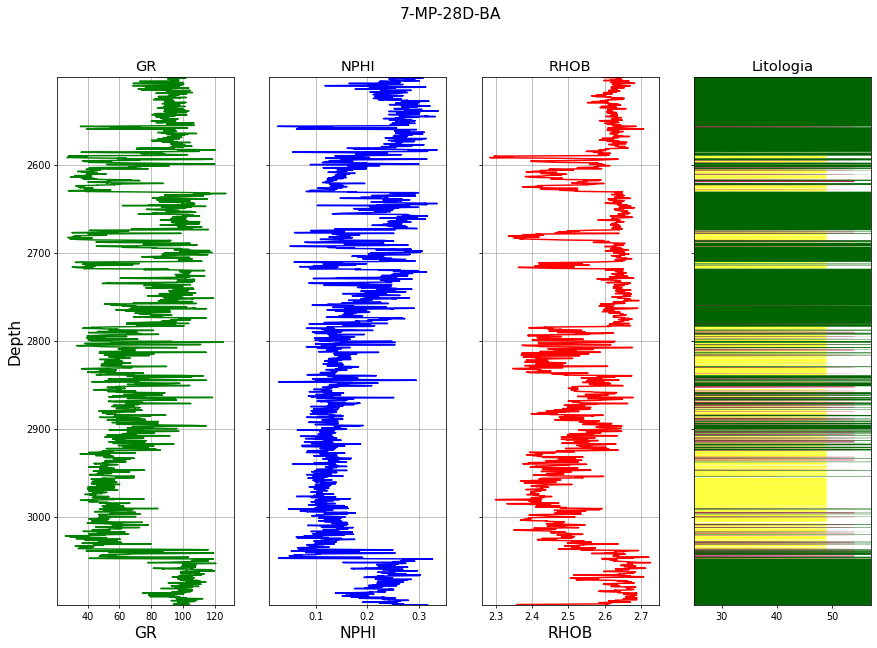

In [11]:
grafico = appynho.plotagem(4, titulo = '7-MP-28D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_28D['GR'], separate_28D['DEPTH'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, separate_28D['NPHI'], separate_28D['DEPTH'], cor = 'b', descricao_x = 'NPHI', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(2, separate_28D['RHOB'], separate_28D['DEPTH'], cor = 'r', descricao_x = 'RHOB', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_l(3, separate_28D['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, curva_limite = separate_28D['LITHOLOGY'], titulo = 'Litologia' )

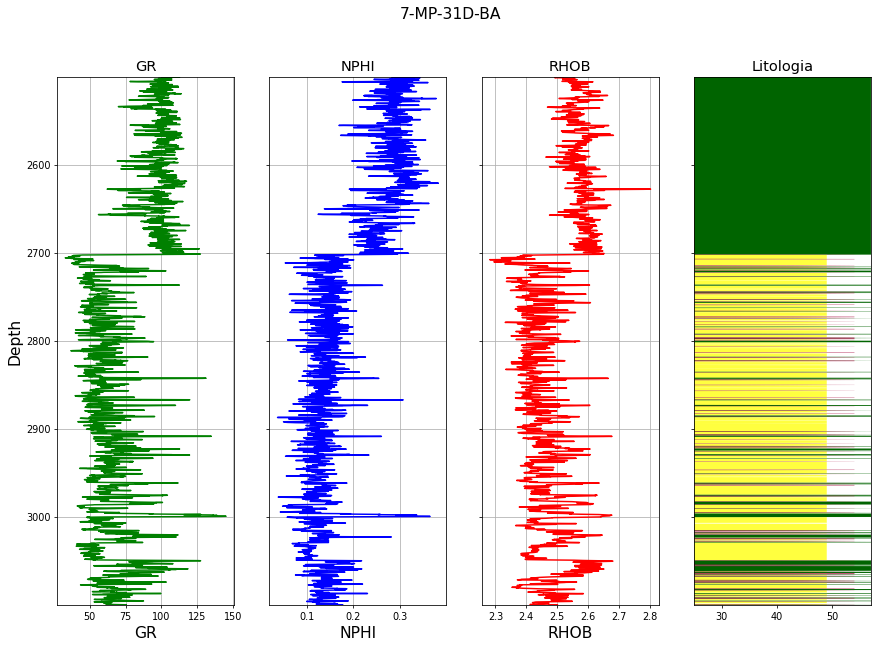

In [12]:
grafico = appynho.plotagem(4, titulo = '7-MP-31D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_31D['GR'], separate_31D['DEPTH'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, separate_31D['NPHI'], separate_31D['DEPTH'], cor = 'b', descricao_x = 'NPHI', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(2, separate_31D['RHOB'], separate_31D['DEPTH'], cor = 'r', descricao_x = 'RHOB', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_l(3, separate_31D['LITHOLOGY'], separate_31D['DEPTH'], relacao_cor = cores, curva_limite = separate_31D['LITHOLOGY'], titulo = 'Litologia' )

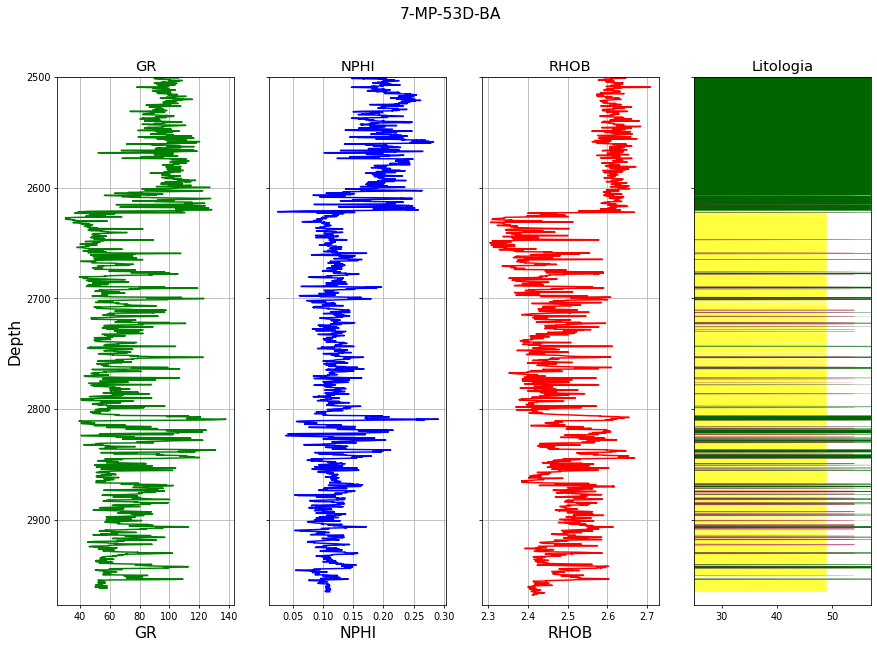

In [13]:
grafico = appynho.plotagem(4, titulo = '7-MP-53D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_53D['GR'], separate_53D['DEPTH'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, separate_53D['NPHI'], separate_53D['DEPTH'], cor = 'b', descricao_x = 'NPHI', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(2, separate_53D['RHOB'], separate_53D['DEPTH'], cor = 'r', descricao_x = 'RHOB', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_l(3, separate_53D['LITHOLOGY'], separate_53D['DEPTH'], relacao_cor = cores, curva_limite = separate_53D['LITHOLOGY'], titulo = 'Litologia' )

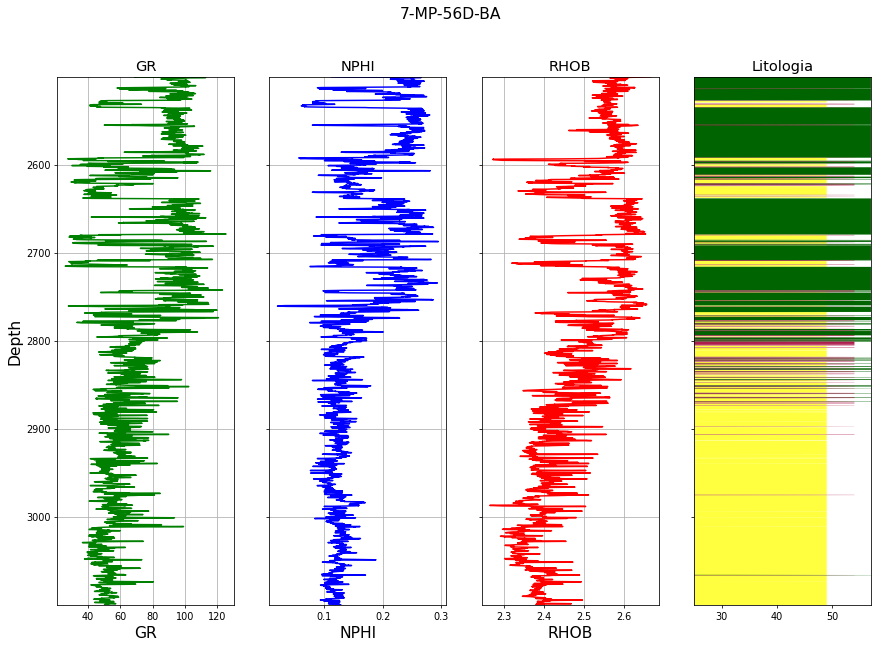

In [14]:
grafico = appynho.plotagem(4, titulo = '7-MP-56D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_56D['GR'], separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, separate_56D['NPHI'], separate_56D['DEPTH'], cor = 'b', descricao_x = 'NPHI', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(2, separate_56D['RHOB'], separate_56D['DEPTH'], cor = 'r', descricao_x = 'RHOB', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_l(3, separate_56D['LITHOLOGY'], separate_56D['DEPTH'], relacao_cor = cores, curva_limite = separate_56D['LITHOLOGY'], titulo = 'Litologia' )

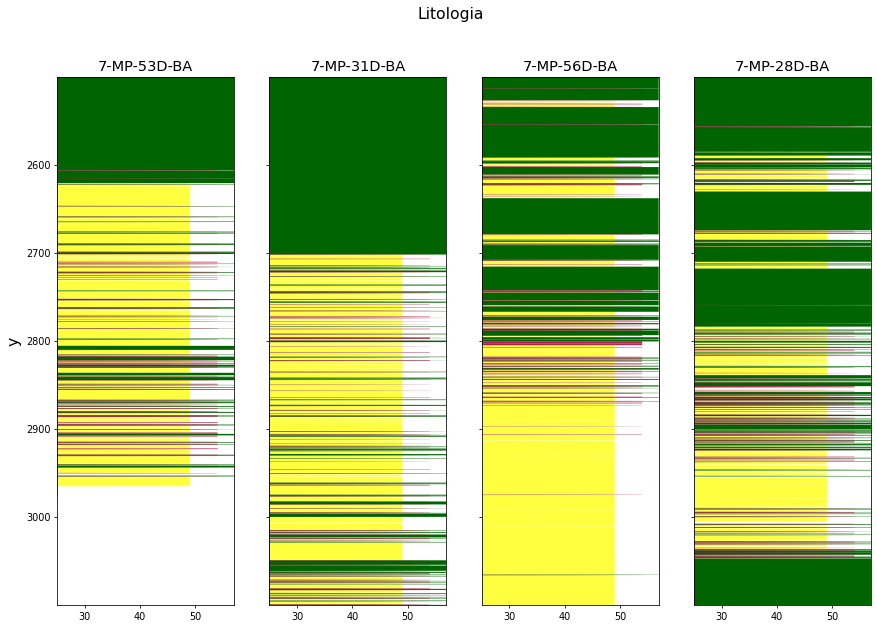

In [15]:
grafico = appynho.plotagem(4, titulo = 'Litologia', altura = 10, comprimento = 15 )
grafico.plot_l(0, separate_53D['LITHOLOGY'], separate_53D['DEPTH'], relacao_cor = cores, curva_limite = separate_53D['LITHOLOGY'], titulo = '7-MP-53D-BA')
grafico.plot_l(1, separate_31D['LITHOLOGY'], separate_31D['DEPTH'], relacao_cor = cores, curva_limite = separate_31D['LITHOLOGY'], titulo = '7-MP-31D-BA')
grafico.plot_l(2, separate_56D['LITHOLOGY'], separate_56D['DEPTH'], relacao_cor = cores, curva_limite = separate_56D['LITHOLOGY'], titulo = '7-MP-56D-BA')
grafico.plot_l(3, separate_28D['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, curva_limite = separate_28D['LITHOLOGY'], titulo = '7-MP-28D-BA')

## Calculando as estatísticas do "poço parâmetro":

In [16]:
intervalo_gr_200, coef_gr_200 = defs.corrcoef(200, separate_28D['GR'], separate_28D['DEPTH'])
intervalo_nphi_200, coef_nphi_200 = defs.corrcoef(200, separate_28D['NPHI'], separate_28D['DEPTH'])
intervalo_rhob_200, coef_rhob_200 = defs.corrcoef(200, separate_28D['RHOB'], separate_28D['DEPTH'])

In [17]:
intervalo_gr, coef_gr = defs.corrcoef(400, separate_28D['GR'], separate_28D['DEPTH'])
intervalo_nphi, coef_nphi = defs.corrcoef(400, separate_28D['NPHI'], separate_28D['DEPTH'])
intervalo_rhob, coef_rhob = defs.corrcoef(400, separate_28D['RHOB'], separate_28D['DEPTH'])

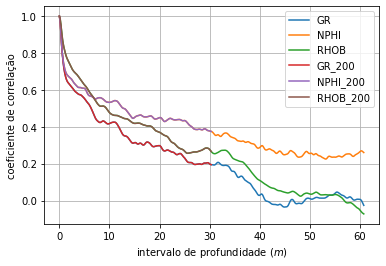

In [18]:
plt.plot(intervalo_gr,coef_gr, label='GR')
plt.plot(intervalo_nphi,coef_nphi, label='NPHI')
plt.plot(intervalo_rhob,coef_rhob, label='RHOB')
plt.plot(intervalo_gr_200,coef_gr_200, label='GR_200')
plt.plot(intervalo_nphi_200,coef_nphi_200, label='NPHI_200')
plt.plot(intervalo_rhob_200,coef_rhob_200, label='RHOB_200')
plt.xlabel('intervalo de profundidade ($m$)')
plt.ylabel('coeficiente de correlação')
plt.grid()
plt.legend()
plt.show()

In [19]:
statistic_28D = defs.statistic_lithology(separate_28D, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB'], step, top, base, overlap)

C:\Users\rmota\OneDrive\Documentos\PFG_2020\PFG_2020\codes\defs.py:393: RuntimeWarning: Mean of empty slice
  m = np.nanmean(curve_save[w])
c:\users\rmota\.conda\envs\tcc2\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [20]:
statistic_28D

{'DEPTH': array([2500.122 , 2500.2744, 2500.4268, ..., 3099.6636, 3099.816 ,
        3099.9684]),
 'GR': array([ 82.9465,  85.1653,  97.942 , ...,  98.4511, 102.3324, 101.9913]),
 'NPHI': array([0.1985, 0.2366, 0.2627, ..., 0.3183, 0.2826, 0.2691]),
 'RHOB': array([2.6524, 2.6342, 2.6136, ..., 2.4002, 2.4042, 2.4056]),
 'DRDN': array([4.66466667, 5.57066667, 6.02866667, ..., 3.614     , 2.504     ,
        2.082     ]),
 'LITHOLOGY': array([57., 57., 57., ..., 57., 57., 57.]),
 'SANDSTONE': {'LITHOLOGY': array([nan, nan, nan, ..., nan, nan, nan]),
  'GR': {'Data': array([nan, nan, nan, ..., nan, nan, nan]),
   'Mean': {'Top': [2500.0,
     2545.0,
     2590.0,
     2635.0,
     2680.0,
     2725.0,
     2770.0,
     2815.0,
     2860.0,
     2905.0,
     2950.0,
     2995.0,
     3040.0],
    'Base': [2550.0,
     2595.0,
     2640.0,
     2685.0,
     2730.0,
     2775.0,
     2820.0,
     2865.0,
     2910.0,
     2955.0,
     3000.0,
     3045.0,
     3090.0],
    'Value': [nan,
   

## Gerando dados sorteados:

In [21]:
gr_sort_56D = defs.sort_curve(separate_56D, statistic_28D, litho_types, 'GR', step, top, base)
nphi_sort_56D = defs.sort_curve(separate_56D, statistic_28D, litho_types, 'NPHI', step, top, base)
rhob_sort_56D = defs.sort_curve(separate_56D, statistic_28D, litho_types, 'RHOB', step, top, base)

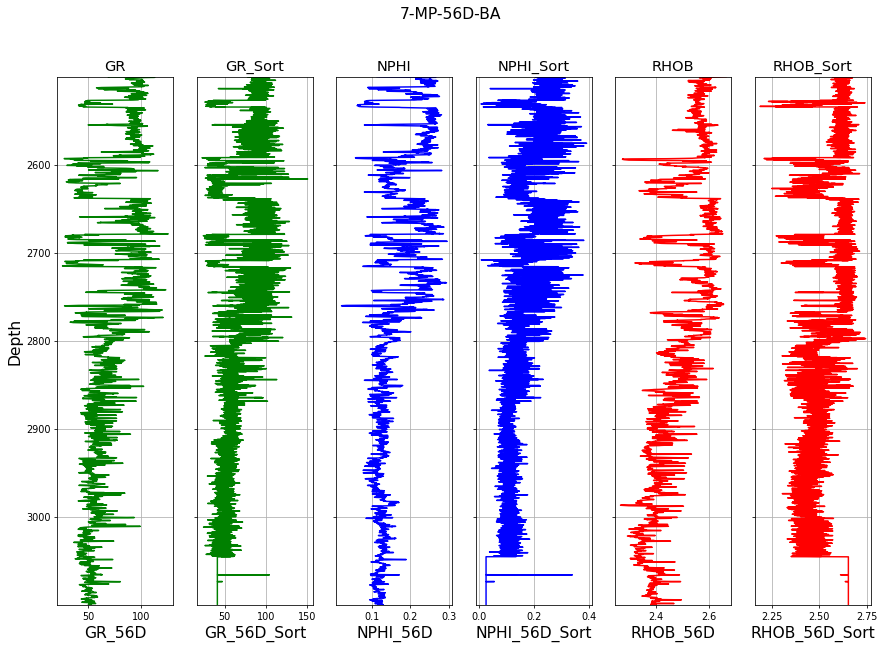

In [23]:
grafico = appynho.plotagem(6, titulo = '7-MP-56D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_56D['GR'], separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR_56D', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(2, separate_56D['NPHI'], separate_56D['DEPTH'], cor = 'b', descricao_x = 'NPHI_56D', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(4, separate_56D['RHOB'], separate_56D['DEPTH'], cor = 'r', descricao_x = 'RHOB_56D', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_s(1, gr_sort_56D, separate_56D['DEPTH'], cor = 'g', descricao_x = 'GR_56D_Sort', descricao_y = 'Depth', titulo = 'GR_Sort')
grafico.plot_s(3, nphi_sort_56D, separate_56D['DEPTH'], cor = 'b', descricao_x = 'NPHI_56D_Sort', descricao_y = 'Depth', titulo = 'NPHI_Sort')
grafico.plot_s(5, rhob_sort_56D, separate_56D['DEPTH'], cor = 'r', descricao_x = 'RHOB_56D_Sort', descricao_y = 'Depth', titulo = 'RHOB_Sort')

In [24]:
gr_sort_31D = defs.sort_curve(separate_31D, statistic_28D, litho_types, 'GR', step, top, base)
nphi_sort_31D = defs.sort_curve(separate_31D, statistic_28D, litho_types, 'NPHI', step, top, base)
rhob_sort_31D = defs.sort_curve(separate_31D, statistic_28D, litho_types, 'RHOB', step, top, base)

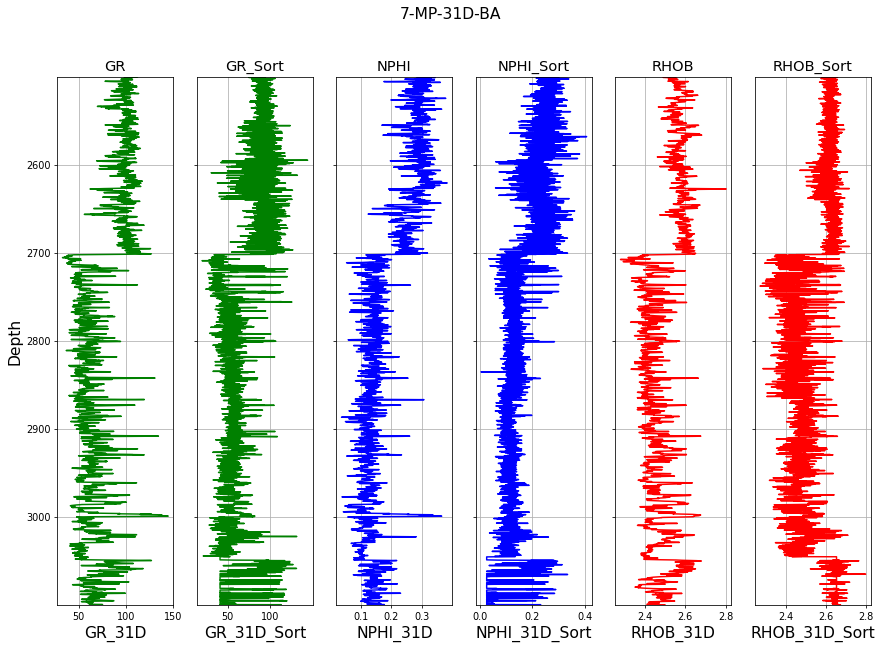

In [26]:
grafico = appynho.plotagem(6, titulo = '7-MP-31D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_31D['GR'], separate_31D['DEPTH'], cor = 'g', descricao_x = 'GR_31D', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(2, separate_31D['NPHI'], separate_31D['DEPTH'], cor = 'b', descricao_x = 'NPHI_31D', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(4, separate_31D['RHOB'], separate_31D['DEPTH'], cor = 'r', descricao_x = 'RHOB_31D', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_s(1, gr_sort_31D, separate_31D['DEPTH'], cor = 'g', descricao_x = 'GR_31D_Sort', descricao_y = 'Depth', titulo = 'GR_Sort')
grafico.plot_s(3, nphi_sort_31D, separate_31D['DEPTH'], cor = 'b', descricao_x = 'NPHI_31D_Sort', descricao_y = 'Depth', titulo = 'NPHI_Sort')
grafico.plot_s(5, rhob_sort_31D, separate_31D['DEPTH'], cor = 'r', descricao_x = 'RHOB_31D_Sort', descricao_y = 'Depth', titulo = 'RHOB_Sort')

In [27]:
gr_sort_53D = defs.sort_curve(separate_53D, statistic_28D, litho_types, 'GR', step, top, base)
nphi_sort_53D = defs.sort_curve(separate_53D, statistic_28D, litho_types, 'NPHI', step, top, base)
rhob_sort_53D = defs.sort_curve(separate_53D, statistic_28D, litho_types, 'RHOB', step, top, base)

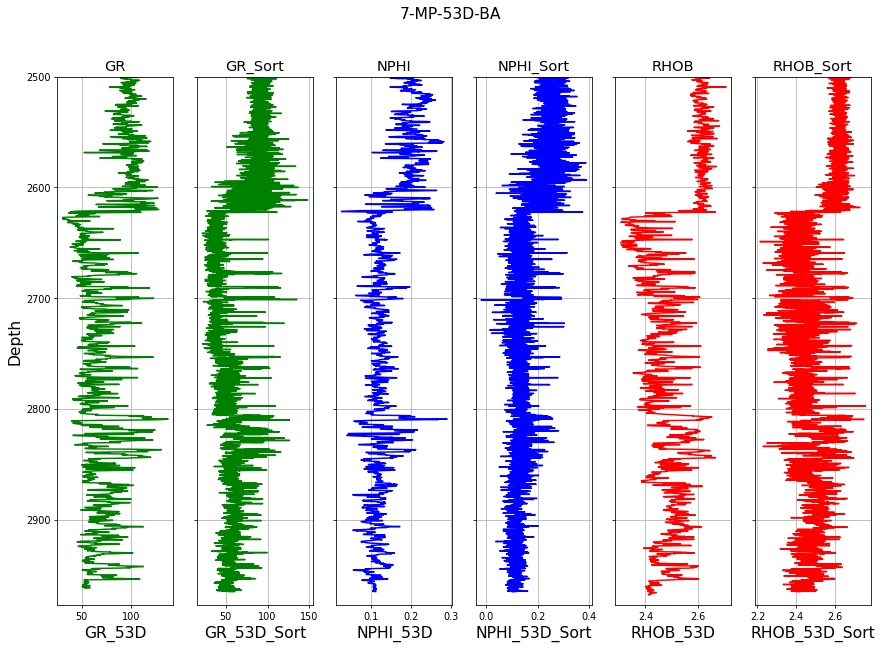

In [28]:
grafico = appynho.plotagem(6, titulo = '7-MP-53D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_53D['GR'], separate_53D['DEPTH'], cor = 'g', descricao_x = 'GR_53D', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(2, separate_53D['NPHI'], separate_53D['DEPTH'], cor = 'b', descricao_x = 'NPHI_53D', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(4, separate_53D['RHOB'], separate_53D['DEPTH'], cor = 'r', descricao_x = 'RHOB_53D', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_s(1, gr_sort_53D, separate_53D['DEPTH'], cor = 'g', descricao_x = 'GR_53D_Sort', descricao_y = 'Depth', titulo = 'GR_Sort')
grafico.plot_s(3, nphi_sort_53D, separate_53D['DEPTH'], cor = 'b', descricao_x = 'NPHI_53D_Sort', descricao_y = 'Depth', titulo = 'NPHI_Sort')
grafico.plot_s(5, rhob_sort_53D, separate_53D['DEPTH'], cor = 'r', descricao_x = 'RHOB_53D_Sort', descricao_y = 'Depth', titulo = 'RHOB_Sort')